In [1]:
# Import libraries for modeling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

In [7]:
# Select features for modeling (make a copy!)
X = df[['Pclass', 'Sex', 'Age']].copy()
y = df['Survived']

# Encode 'Sex' column: male -> 0, female -> 1
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Fill missing values in 'Age' with the mean
X['Age'] = X['Age'].fillna(X['Age'].mean())

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7932960893854749


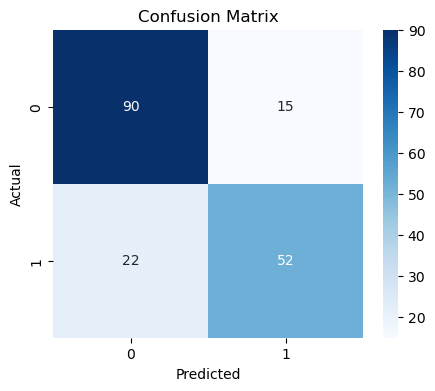

In [15]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()